In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [4]:
df = pd.read_csv('data/stud.csv')

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
X = df.drop('math_score', axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [18]:
y = df.math_score
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [12]:
num_col = X.select_dtypes(exclude='object').columns
cat_col = X.select_dtypes(include='object').columns

ohe = OneHotEncoder()
ss = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",ohe,cat_col),
        ("StandardScaler",ss,num_col)
    ]
)

In [14]:
X_pre = preprocessor.fit_transform(X)

X_pre

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X_pre,y,test_size=0.2,random_state=2024)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [22]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3460
- Mean Absolute Error: 4.2728
- R2 Score: 0.8810
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.2676
- Mean Absolute Error: 4.1644
- R2 Score: 0.8521


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5840
- Mean Absolute Error: 5.1889
- R2 Score: 0.8195
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.2871
- Mean Absolute Error: 4.9624
- R2 Score: 0.7892


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3463
- Mean Absolute Error: 4.2720
- R2 Score: 0.8810
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.2636
- Mean Absolute Error: 4.1619
- R2 Score: 0.8523


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.9030
- Mean Absolute Error: 4.6928
- R2 Score: 0.8549
-----------------------

In [24]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.852279
0,Linear Regression,0.852058
7,CatBoosting Regressor,0.841400
5,Random Forest Regressor,0.838283
8,AdaBoost Regressor,0.833205
6,XGBRegressor,0.796650
1,Lasso,0.789246
3,K-Neighbors Regressor,0.765992
4,Decision Tree,0.691505


In [26]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is {:.2f}".format(score))

 Accuracy of the model is 85.21


Text(0, 0.5, 'Predicted')

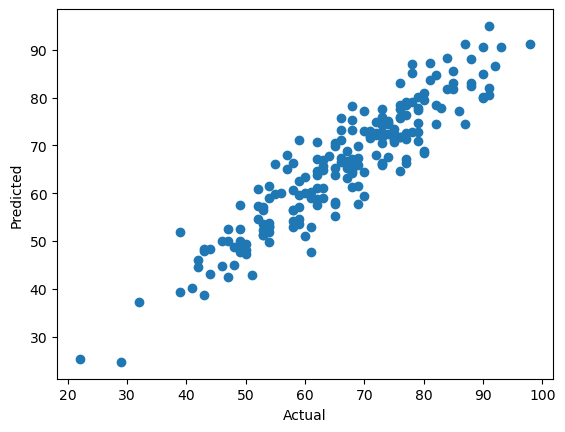

In [27]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [28]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
444,79,77.857414,1.142586
898,67,63.230850,3.769150
186,80,79.566864,0.433136
584,69,69.806231,-0.806231
664,80,68.923714,11.076286
...,...,...,...
70,58,56.555306,1.444694
998,68,66.448796,1.551204
257,78,78.993655,-0.993655
434,73,72.732835,0.267165
